In [3]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
directory_path = "/scratch/user/mtnix12/CSCE435/CSCE435_Project_2024/cali_files/sample/"
# caliper_files = glob(directory_path + "*.cali")
# caliper_files = glob(directory_path + "*65536.cali")
caliper_files = glob(directory_path + "*.cali")
# caliper_files = glob(directory_path + "*268435456.cali")
tk = th.Thicket.from_caliperreader(caliper_files)

(2/2) Creating Thicket: 100%|██████████| 279/279 [00:11<00:00, 24.59it/s]


In [5]:
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")

In [6]:
display(tk.dataframe.head())

nid   spot.channel  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 25268110   1.0  regionprofile   
                                     54571212   1.0  regionprofile   
                                     75260857   1.0  regionprofile   
                                     96382717   1.0  regionprofile   
                                     134921820  1.0  regionprofile   

                                                Min time/rank  Max time/rank  \
node                                 profile                                   
{'name': 'main', 'type': 'function'} 25268110        0.421131       0.421189   
                                     54571212        1.990979       2.050741   
                                     75260857        0.916840       0.918408   
                                     96382717        0.795777       0.797730   
                                     134921820       1.933111       2.030326   

                                                Avg time/rank   Total time  \
node                                 profile                                 
{'name': 'main', 'type': 'function'} 25268110        0.421153     1.684613   
                                     54571212        2.036710  1042.795482   
                                     75260857        0.917623     7.340984   
                                     96382717        0.796684     6.373469   
                                     134921820       1.982961   126.909528   

                                                Variance time/rank  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 25268110             0.000000   
                                     54571212             0.000055   
                                     75260857             0.000000   
                                     96382717             0.000000   
                                     134921820            0.001870   

                                                Min time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 25268110              0.005771   
                                     54571212              0.005975   
                                     75260857              0.011571   
                                     96382717              0.005941   
                                     134921820             0.008893   

                                                Max time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 25268110              0.006329   
                                     54571212              0.008107   
                                     75260857              0.013058   
                                     96382717              0.006881   
                                     134921820             0.023596   

                                                Avg time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 25268110              0.006039   
                                     54571212              0.006246   
                                     75260857              0.012445   
                                     96382717              0.006292   
                                     134921820             0.011446   

                                                Total time (exc)  \
node                                 profile                       
{'name': 'main', 'type': 'function'} 25268110           0.024156   
                                     54571212           3.197957   
                                     75260857           0.099559   
                                     96382717           0.050332   
                                     134921820          

In [7]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.421 main
├─ 0.001 MPI_Comm_dup
├─ 0.000 MPI_Comm_rank
├─ 0.000 MPI_Comm_size
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.389 MPI_Init
│  └─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.012 comm
│  ├─ 0.004 comm_large
│  │  ├─ 0.001 MPI_Alltoall
│  │  │  └─ 0.001 MPI_Alltoall
│  │  └─ 0.004 MPI_Alltoallv
│  │     └─ 0.004 MPI_Alltoallv
│  └─ 0.008 comm_small
│     ├─ 0.003 MPI_Bcast
│     │  └─ 0.003 MPI_Bcast
│     └─ 0.004 MPI_Gather
│        └─ 0.004 MPI_Gather
├─ 0.010 comp
│  ├─ 0.010 comp_large
│  └─ 0.000 comp_small
├─ 0.003 correctness_check
│  ├─ 0.001 MPI_Allreduce
│  ├─ 0.001 MPI_Recv
│  └─ 0.000 MPI_Send
└─ 0.001 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 0.42 indices: {'profile': 25268110})
█ 0.38 - 0.42
█ 0.29 - 0.38
█ 0.21 - 0.29
█ 0.13 - 0.21
█ 0.04 - 0.13
█ 

In [67]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25268110,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i0-p4-a65536.cali,true,true,true,true,1729741337,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 65536, 0]",c,sample_sort,mpi,int,4,65536,random,4,strong,22,online
54571212,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i0-p512-a262144.cali,true,true,true,true,1729647474,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 262144, 0]",c,sample_sort,mpi,int,4,262144,random,512,strong,22,online
75260857,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i3-p8-a4194304.cali,true,true,true,true,1729623687,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 4194304, 3]",c,sample_sort,mpi,int,4,4194304,one_percent_perturbed,8,strong,22,online
96382717,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i2-p8-a262144.cali,true,true,true,true,1729623430,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 262144, 2]",c,sample_sort,mpi,int,4,262144,reverse_sorted,8,strong,22,online
134921820,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i3-p64-a16777216....,true,true,true,true,1729642989,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 16777216, 3]",c,sample_sort,mpi,int,4,16777216,one_percent_perturbed,64,strong,22,online
139893344,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i3-p4-a262144.cali,true,true,true,true,1729741355,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 262144, 3]",c,sample_sort,mpi,int,4,262144,one_percent_perturbed,4,strong,22,online
198799221,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i2-p64-a268435456...,true,true,true,true,1729643498,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 268435456, 2]",c,sample_sort,mpi,int,4,268435456,reverse_sorted,64,strong,22,online
205128529,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i0-p64-a4194304.cali,true,true,true,true,1729642944,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 4194304, 0]",c,sample_sort,mpi,int,4,4194304,random,64,strong,22,online
205458424,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,../../cali_files/sample_sort/i3-p256-a65536.cali,true,true,true,true,1729646369,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample_sort, 65536, 3]",c,sample_sort,mpi,int,4,65536,one_percent_perturbed,256,strong,22,online


In [8]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
input_types = ['random', 'sorted', 'reverse_sorted', 'one_percent_perturbed']
array_type_labels = {0: 'Random', 1: 'Sorted', 2: 'Reverse', 3: 'Perturbed'}


In [9]:
# Change font size for all plots
plt.rcParams.update({"font.size": 16})

In [10]:
def plot_strong_scaling(df, title, xlabel, ylabel, filename):
    fig, ax = plt.subplots(figsize=(15, 7))
    for array_type in df['input_type'].unique():
        filtered_df = df[df['input_type'] == array_type]
        label = array_type_labels.get(array_type, f"{array_type}")  # Get custom label or default to "Type N"
        ax.plot(filtered_df['num_procs'], filtered_df['Avg time/rank'], marker='o', label=label)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title="Input Type")
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

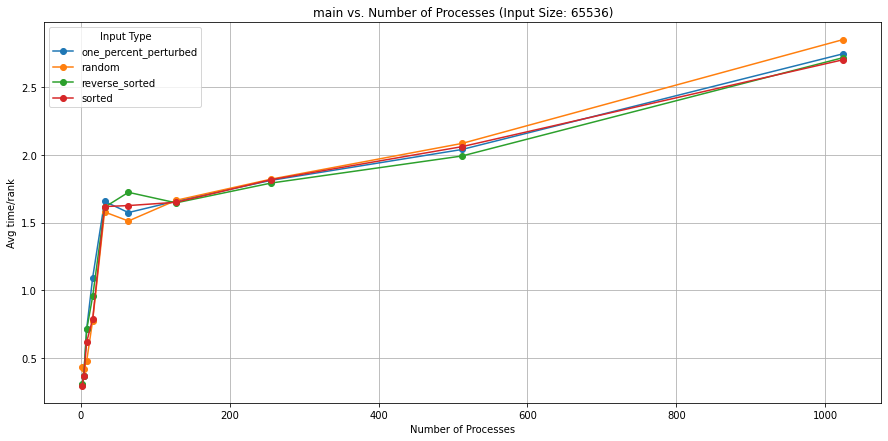

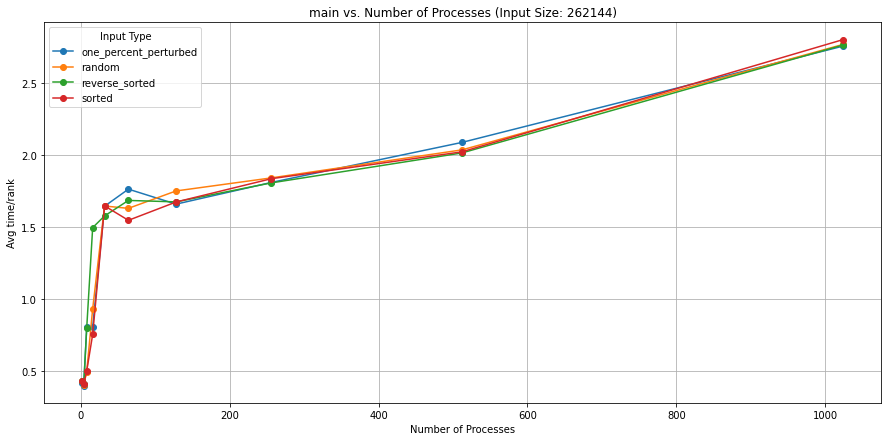

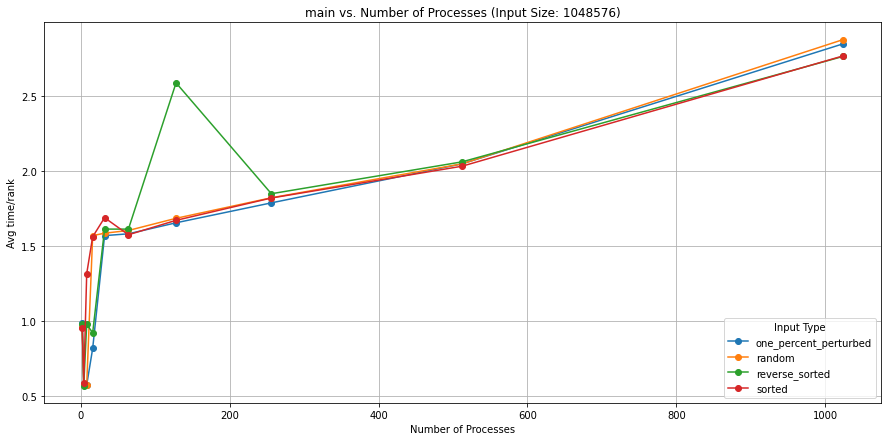

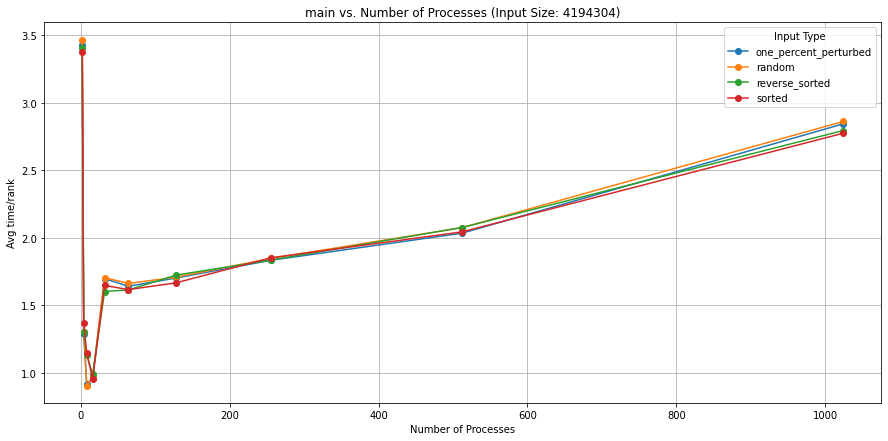

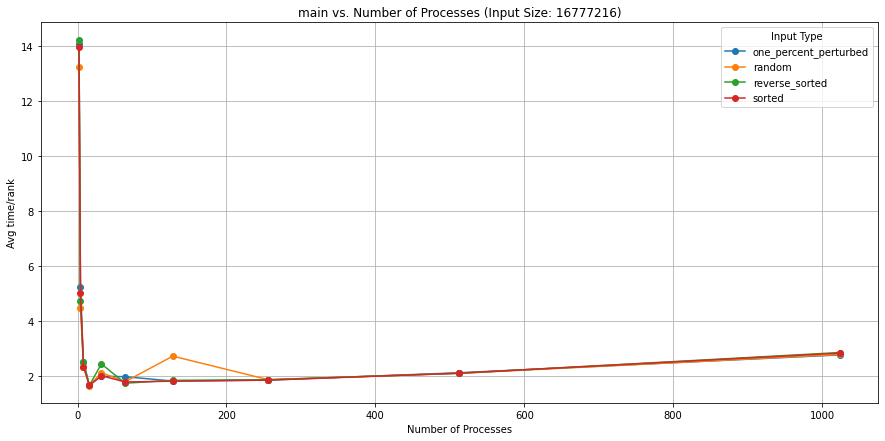

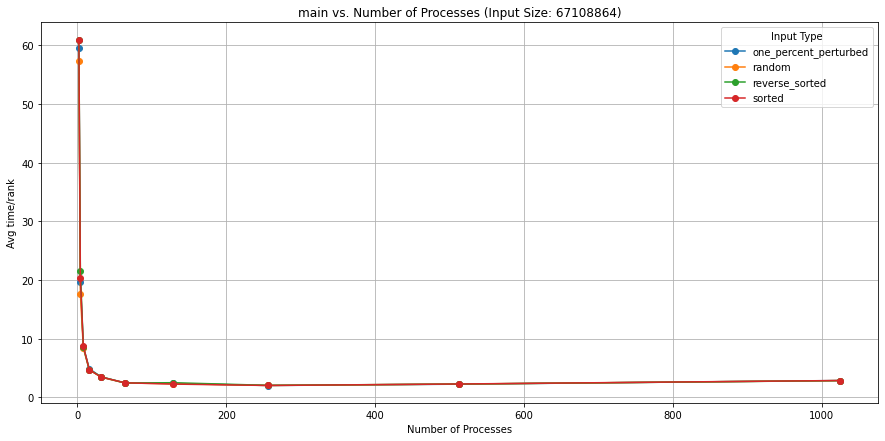

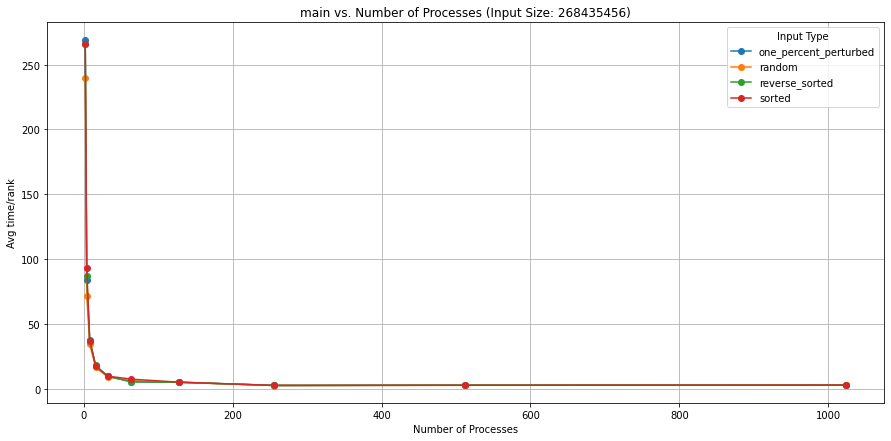

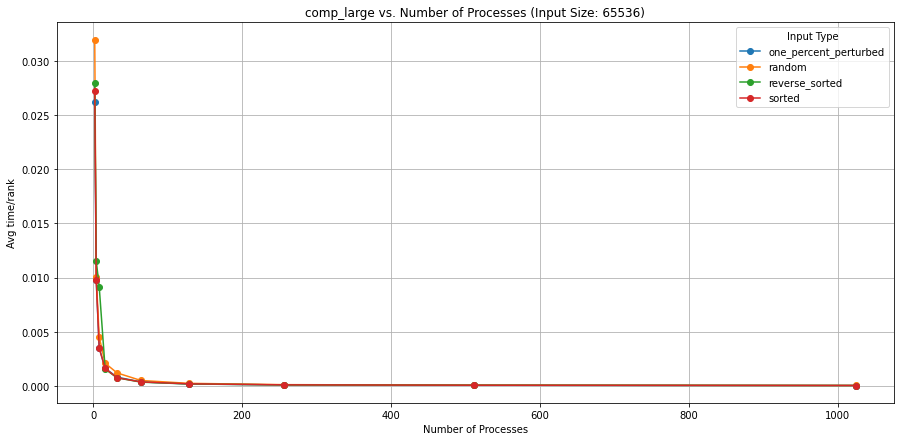

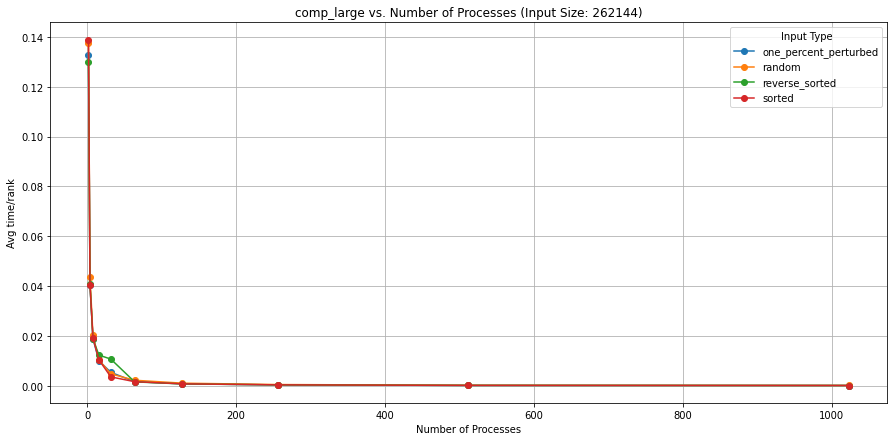

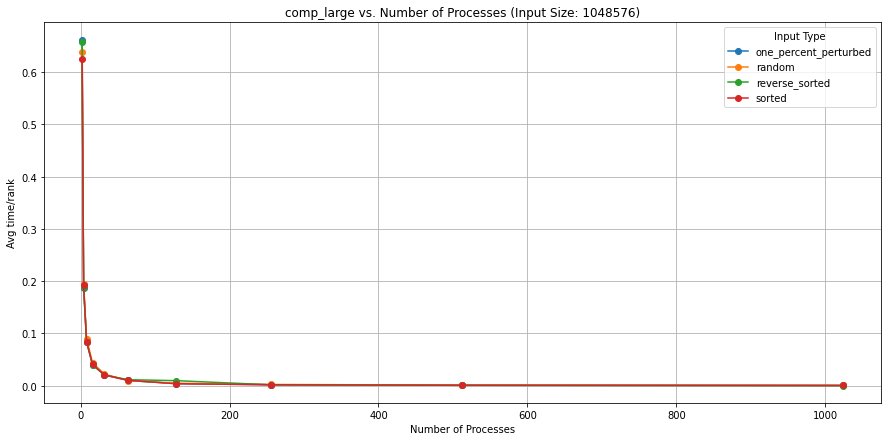

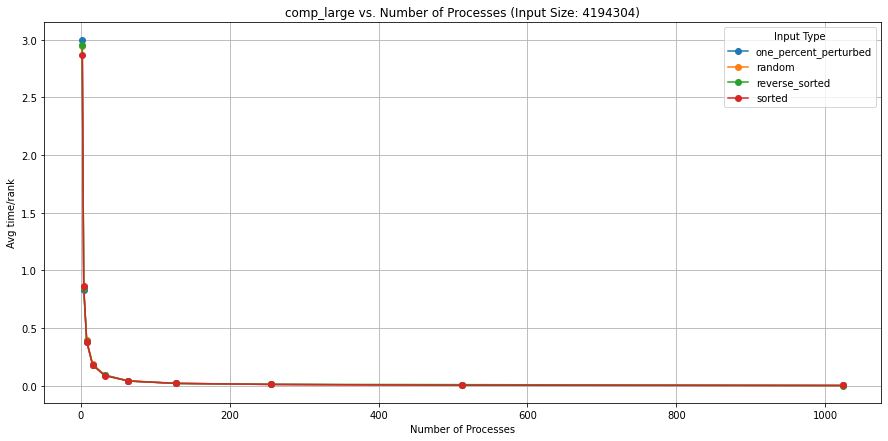

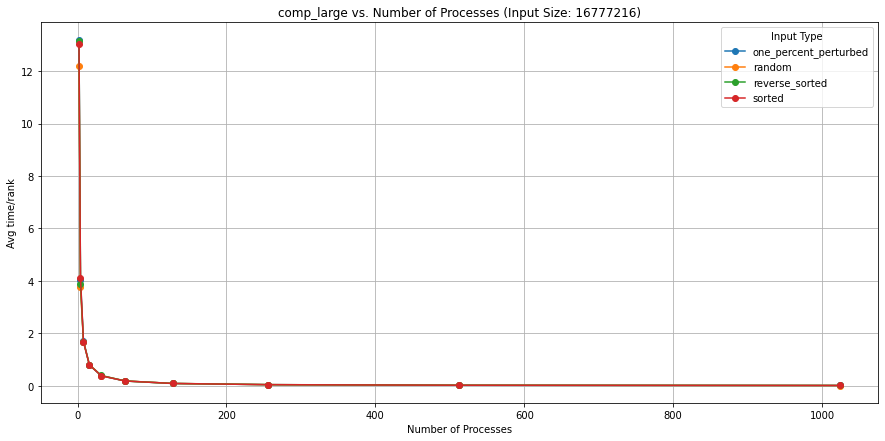

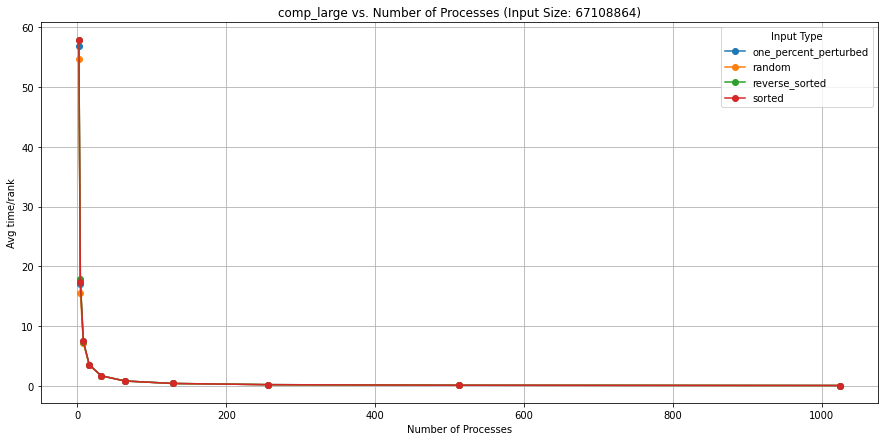

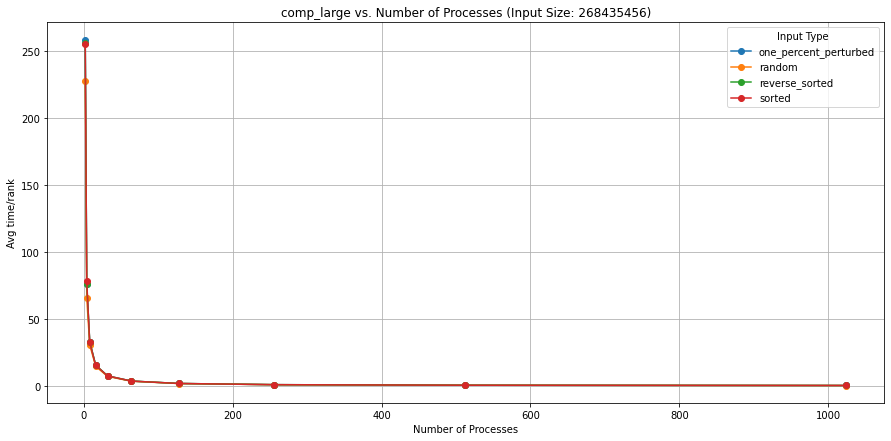

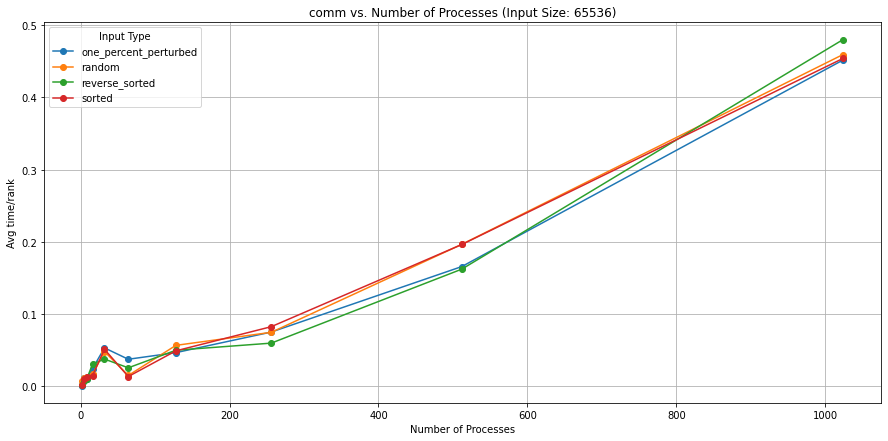

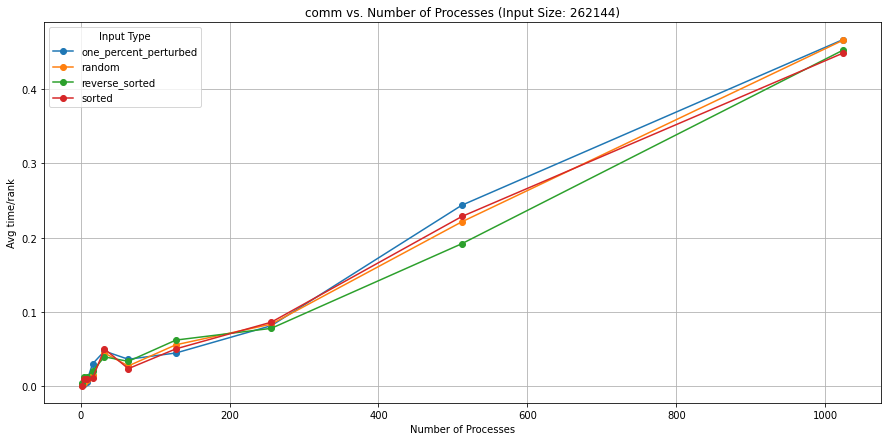

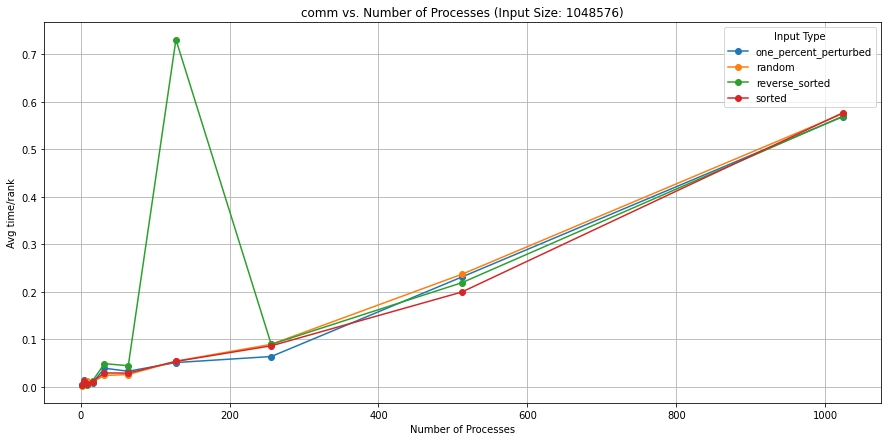

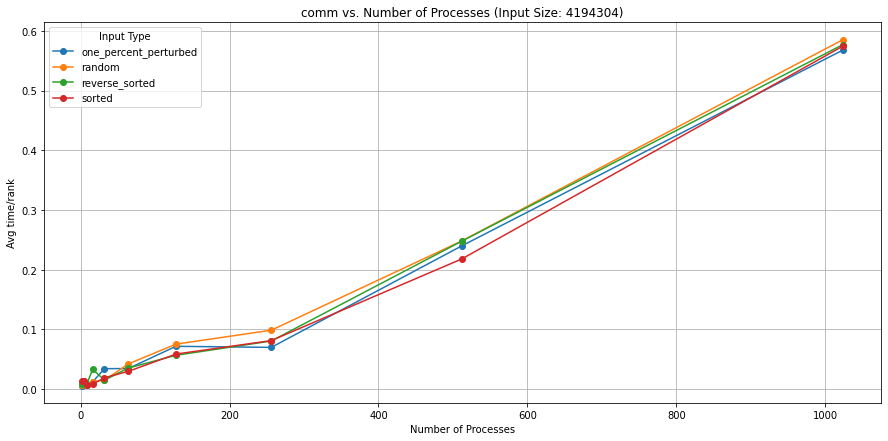

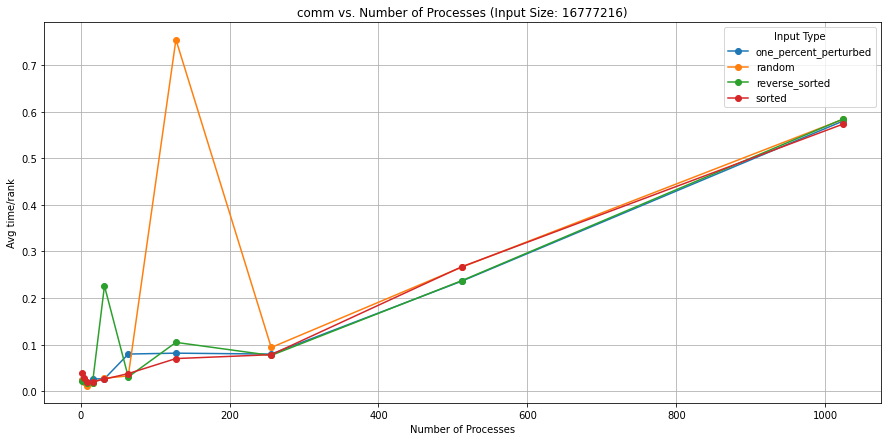

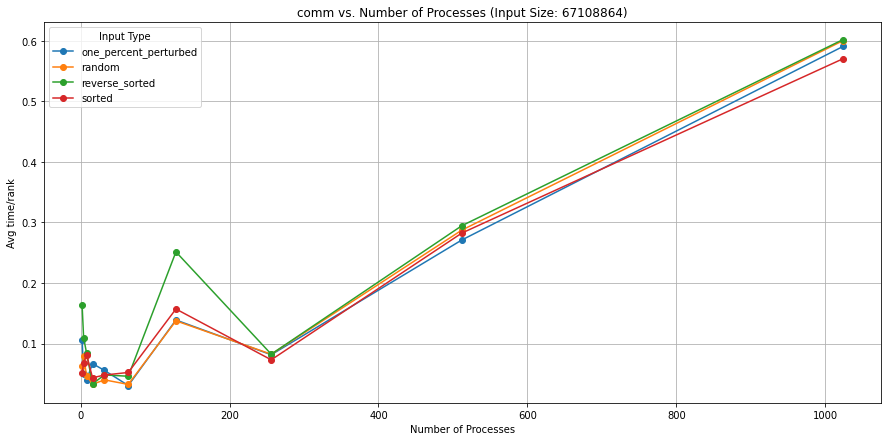

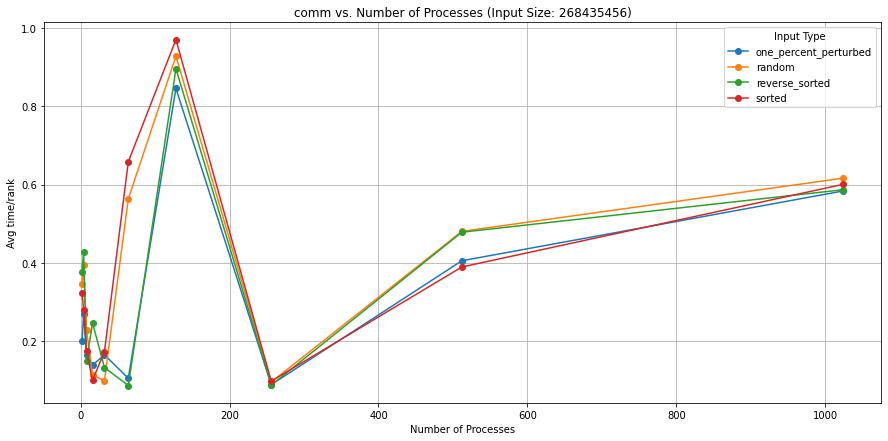

In [11]:
for name in ['main', 'comp_large', 'comm']:
    for input_size in input_sizes:
        curr_df = tk.dataframe
        curr_df = curr_df[curr_df['name'] == name]
        curr_df = curr_df[curr_df['input_size'] == input_size]
        curr_df = curr_df.groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()
        x_label = 'Number of Processes'
        y_label = 'Avg time/rank'
        title = f'{name} vs. Number of Processes (Input Size: {input_size})'
        filename = f'/scratch/user/mtnix12/CSCE435/CSCE435_Project_2024/images/sample/strong_scaling_{name}_{input_size}.png'
        plot_strong_scaling(curr_df, title, x_label, y_label, filename)
        

In [12]:
def plot_strong_scaling_speedup(df,  title, xlabel, ylabel, filename):
    fig, ax = plt.subplots(figsize=(15, 7))
    for input_size in df['input_size'].unique():
        filtered_df = df[df['input_size'] == input_size]
        t1 = (filtered_df[filtered_df['num_procs'] == 2]['Avg time/rank'].values[0])*2
        filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
        label = input_size
        ax.plot(filtered_df['num_procs'], filtered_df['speedup'], marker='o', label=label)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title="Input Type")
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



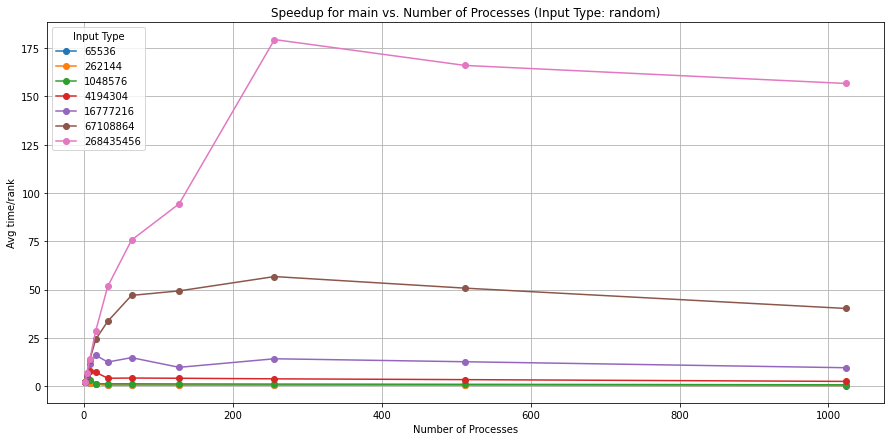

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



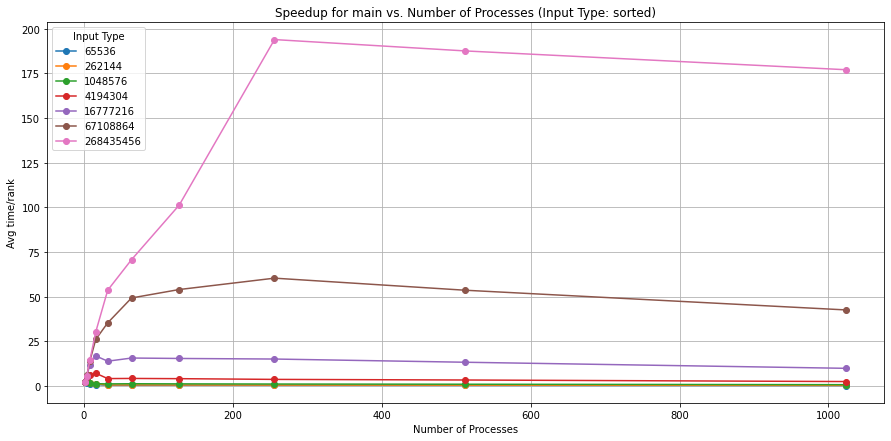

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



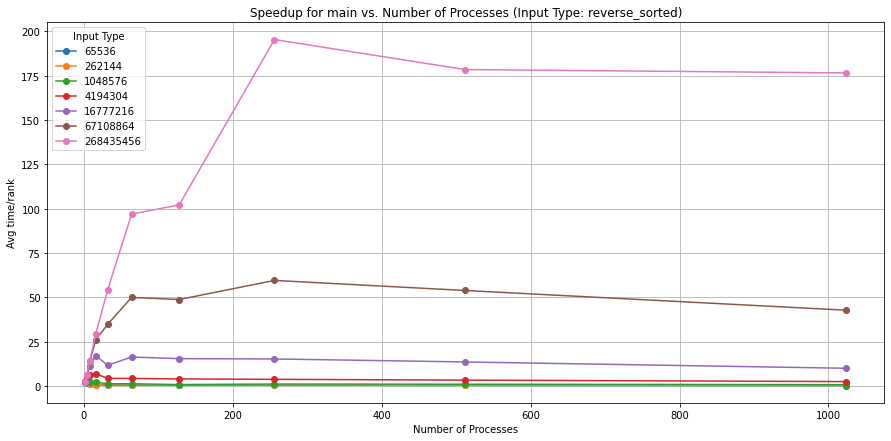

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



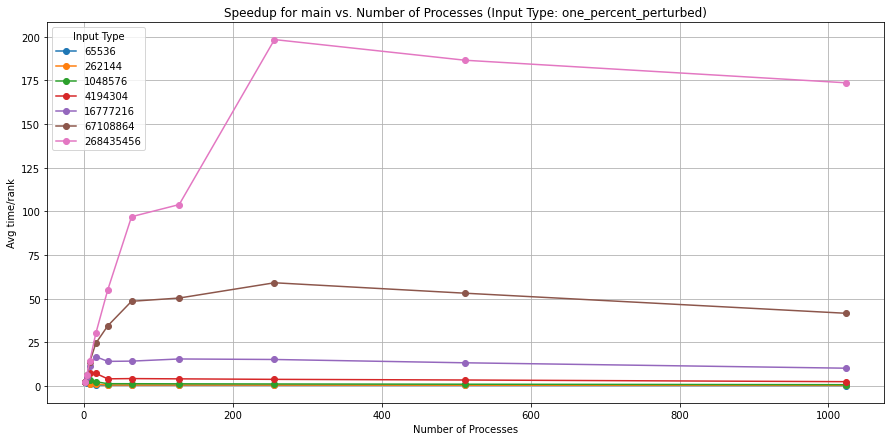

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



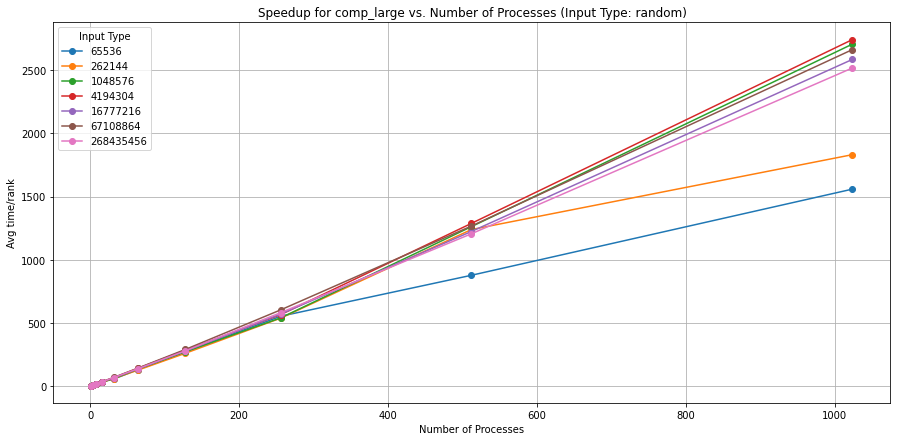

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



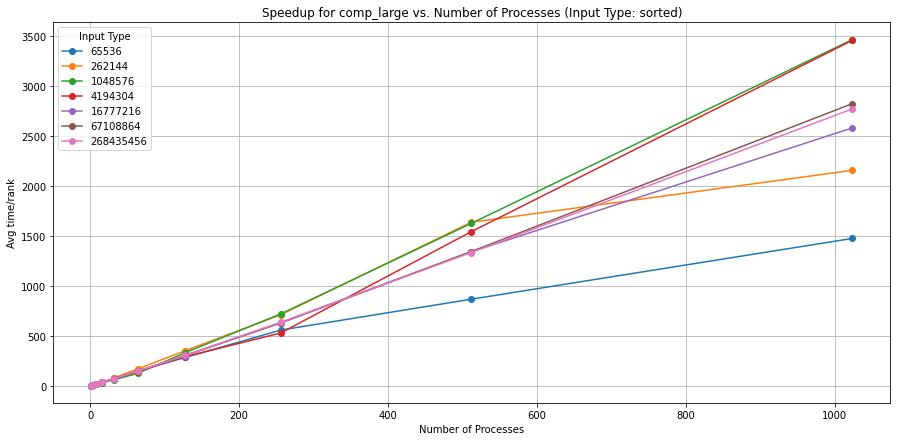

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



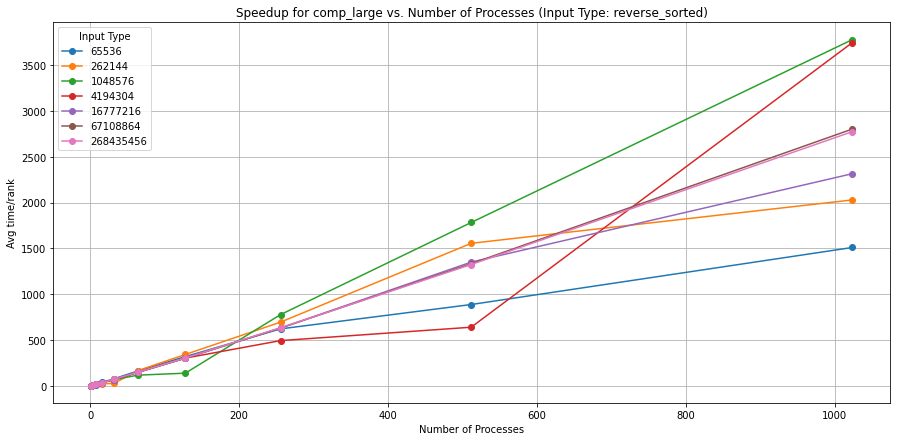

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



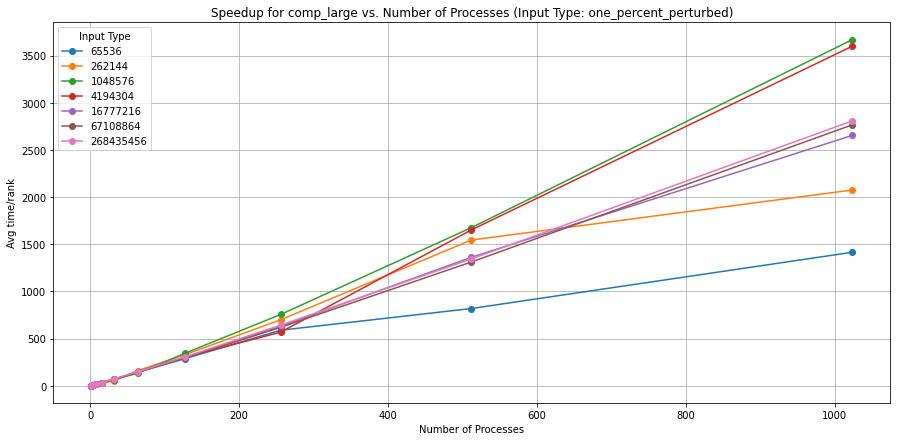

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



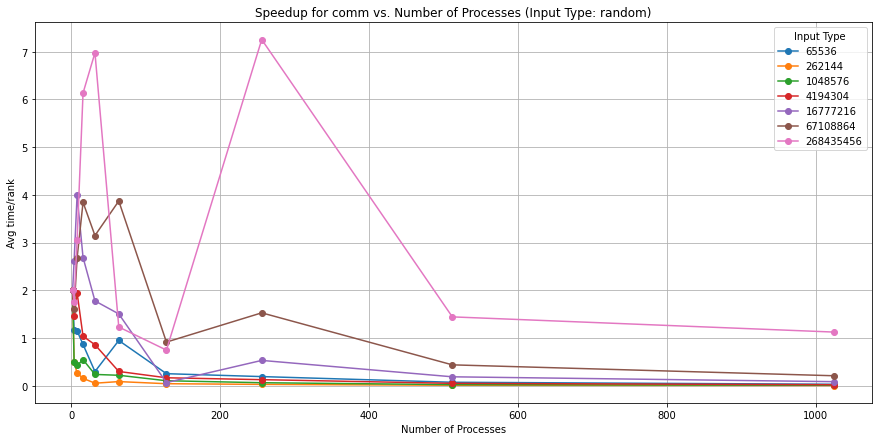

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



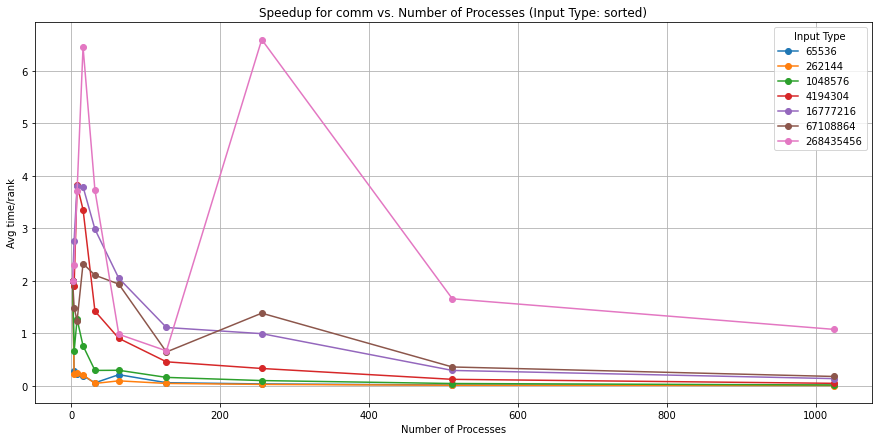

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



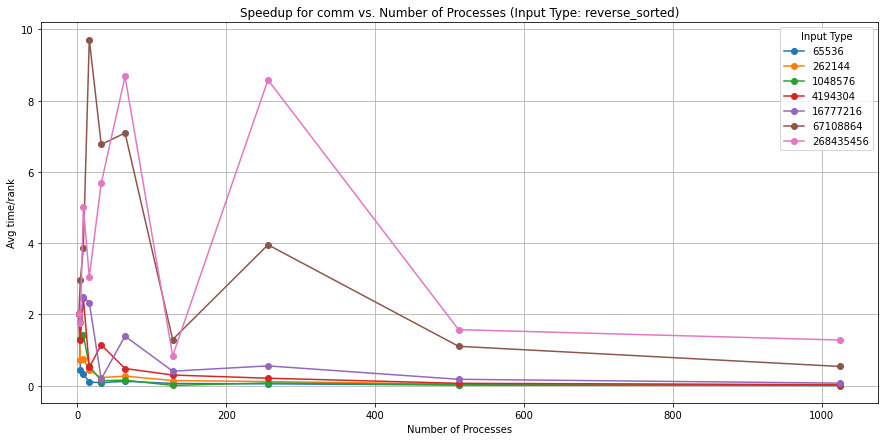

/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['speedup'] = t1 / filtered_df['Avg time/rank']
/tmp/job.11874252/ipykernel_186914/618804464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



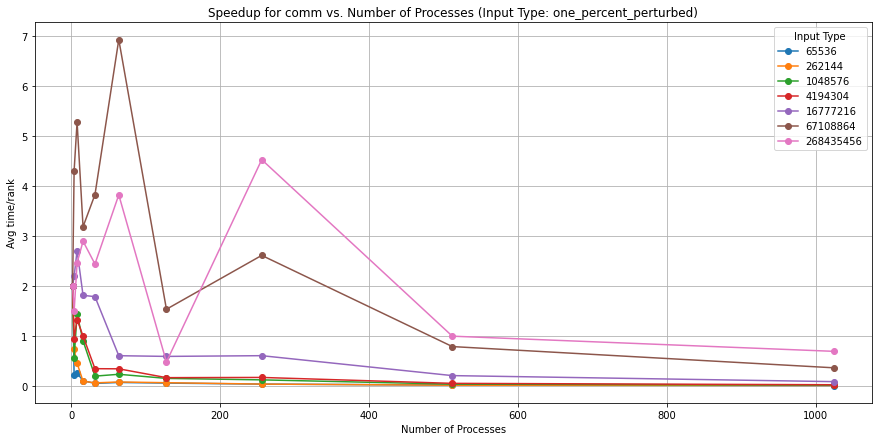

In [13]:
for name in ['main', 'comp_large', 'comm']:
    for input_type in input_types:
        curr_df = tk.dataframe
        curr_df = curr_df[curr_df['name'] == name]
        curr_df = curr_df[curr_df['input_type'] == input_type]
        curr_df = curr_df.groupby(['num_procs', 'input_size'])['Avg time/rank'].mean().reset_index()
        x_label = 'Number of Processes'
        y_label = 'Avg time/rank'
        title = f'Speedup for {name} vs. Number of Processes (Input Type: {input_type})'
        filename = f'/scratch/user/mtnix12/CSCE435/CSCE435_Project_2024/images/sample/strong_scaling_speedup_{name}_{input_type}.png'
        plot_strong_scaling_speedup(curr_df, title, x_label, y_label, filename)

In [64]:
weak_sizes = [2**16, 2**18, 2**20, 2**22, 2**24]
weak_processes = [2, 8, 32, 128, 512]
proc_size_map = dict(zip(weak_processes, weak_sizes))
def plot_weak_scaling(df, title, xlabel, ylabel, filename):
    fig, ax = plt.subplots(figsize=(15, 7))
    df.head()
    filtered_df = df[(df['num_procs'].isin(proc_size_map.keys())) & (df.apply(lambda row: row['num_procs'] in proc_size_map and proc_size_map[row['num_procs']] == row['input_size'], axis=1))]
#     print(df.head)
#     dfs = {}
    
    
    for i in filtered_df['input_type'].unique():
        curr_df = filtered_df[filtered_df['input_type'] == array_type]
        label = array_type_labels.get(array_type, f"{array_type}")  # Get custom label or default to "Type N"
        ax.plot(curr_df['num_procs'], curr_df['Avg time/rank'], marker='o', label=label)

    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale('log', base=2)
    ax.legend(title="Input Type")
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

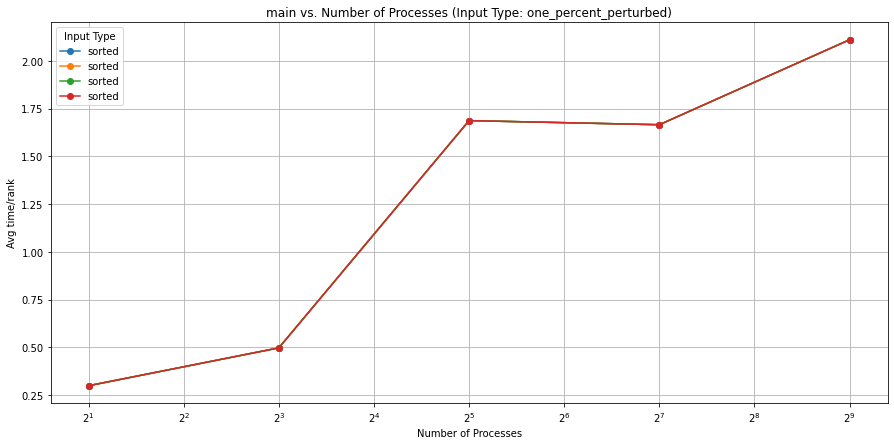

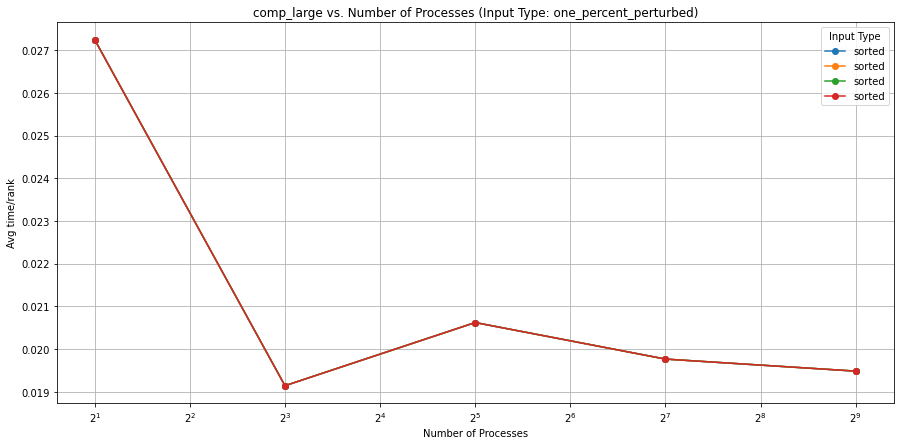

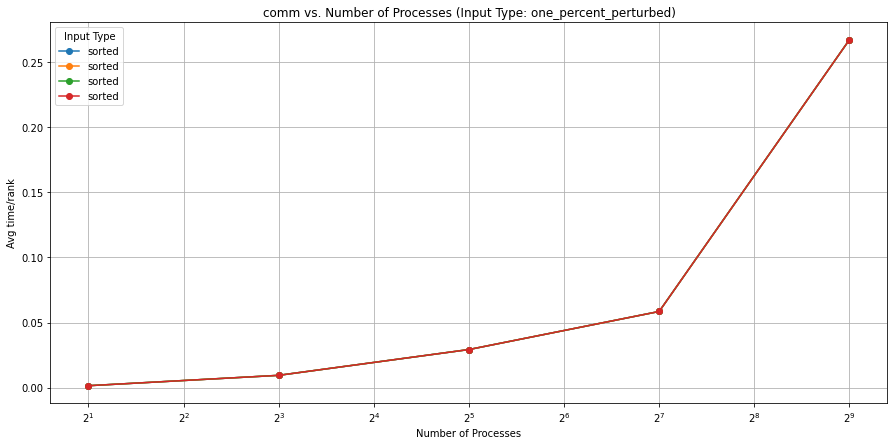

In [66]:
for name in ['main', 'comp_large', 'comm']:
#     for input_type in input_types:
        curr_df = tk.dataframe
#         print(curr_df.head())
        curr_df = curr_df[curr_df['name'] == name]
#         curr_df = curr_df[(curr_df['input_type'] == input_type) & (curr_df['name'] == name)]
#         print(curr_df.head())
#         curr_df = curr_df[curr_df['name'] == name]
#         curr_df = curr_df[curr_df['input_type'] == input_type]
        curr_df = curr_df.groupby(['num_procs', 'input_size', 'input_type'])['Avg time/rank'].mean().reset_index()
        x_label = 'Number of Processes'
        y_label = 'Avg time/rank'
        title = f'{name} vs. Number of Processes (Input Type: {input_type})'
        filename = f'/scratch/user/mtnix12/CSCE435/CSCE435_Project_2024/images/sample/weak_scaling_{name}_{input_type}.png'
        plot_weak_scaling(curr_df, title, x_label, y_label, filename)
        

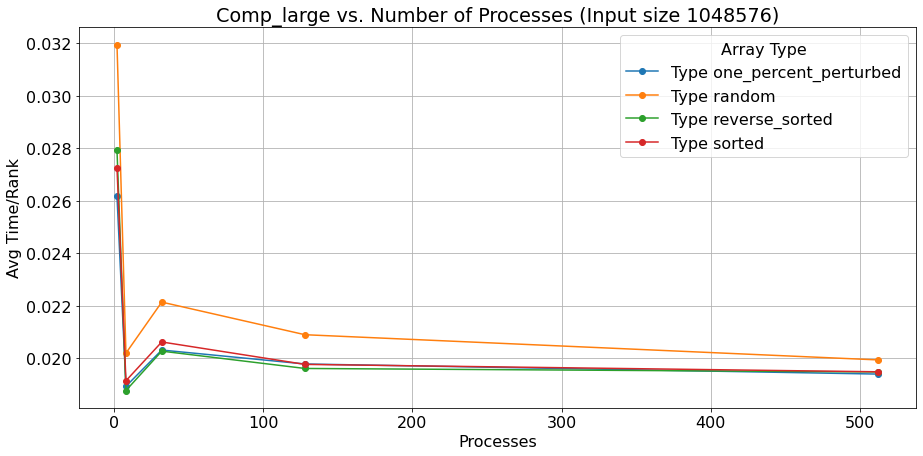

In [53]:
# Filter for only 'comp' in the 'name' column
comp_df = tk.dataframe[tk.dataframe['name'] == 'comp_large']

# Group data by number of processes and array type, calculating the mean
grouped_df = comp_df.groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()

# Define your custom labels for array types
array_type_labels = {0: 'Random', 1: 'Sorted', 2: 'Reverse', 3: 'Perturbed'}

# Plotting function with custom labels in the legend
def plot_performance(df, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(15, 7))
    for array_type in df['input_type'].unique():
        filtered_df = df[df['input_type'] == array_type]
        label = array_type_labels.get(array_type, f"Type {array_type}")  # Get custom label or default to "Type N"
        ax.plot(filtered_df['num_procs'], filtered_df['Avg time/rank'], marker='o', label=label)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title="Array Type")
    plt.grid(True)
    plt.show()

# Plot the performance data
plot_performance(grouped_df, "Comp_large vs. Number of Processes (Input size 1048576)", "Processes", "Avg Time/Rank")

In [54]:
# Filter for only 'comp' in the 'name' column
comp_df = tk.dataframe[tk.dataframe['name'] == 'comp_large']
input_types = ['random', 'sorted', 'reverse_sorted', 'one_percent_perturbed']

# Group data by number of processes and array type, calculating the mean
grouped_df = comp_df.groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()
# print(grouped_df.head)

# Define your custom labels for array types
array_type_labels = {0: 'Random', 1: 'Sorted', 2: 'Reverse', 3: 'Perturbed'}

# Initialize a dictionary to store data in lists by array type
data_lists = {array_type: [] for array_type in array_type_labels.values()}

# Populate the lists with tuples of (num_procs, Avg time/rank) for each array type
for array_type, label in array_type_labels.items():
    
    filtered_df = grouped_df[grouped_df['input_type'] == input_types[array_type]]
    data_lists[label] = list(zip(filtered_df['num_procs'], filtered_df['Avg time/rank']))

# Now `data_lists` contains lists of (num_procs, Avg time/rank) for each array type
# You can print it to verify
for label, data in data_lists.items():
    print(f"{label}: {data}")

Random: [(2, 0.031958), (8, 0.020198), (32, 0.022143), (128, 0.0209), (512, 0.01994)]
Sorted: [(2, 0.027241), (8, 0.019146), (32, 0.020624), (128, 0.019769), (512, 0.019487)]
Reverse: [(2, 0.027922), (8, 0.018774), (32, 0.020274), (128, 0.019614), (512, 0.019481)]
Perturbed: [(2, 0.026172), (8, 0.018936), (32, 0.020316), (128, 0.019785), (512, 0.0194)]


In [55]:
# Define custom labels for array types
array_type_labels = {0: 'Random', 1: 'Sorted', 2: 'Reverse', 3: 'Perturbed'}

# Initialize a dictionary to store speedup data by array type
speedup_data = {array_type_labels.get(array_type, f"Type {array_type}"): [] for array_type in merged_df['input_type'].unique()}

# Populate the lists with tuples of (num_procs, speedup) for each array type
for array_type in merged_df['input_type'].unique():
    filtered_df = merged_df[merged_df['input_type'] == array_type]
    label = array_type_labels.get(array_type, f"Type {array_type}")
    speedup_data[label] = list(zip(filtered_df['num_procs'], filtered_df['speedup']))

# Display the speedup data for verification
for label, data in speedup_data.items():
    print(f"{label}: {data}")

NameError: name 'merged_df' is not defined

In [56]:
# Filter for only 'comp' in the 'name' column
comp_df = tk.dataframe[tk.dataframe['name'] == 'comp_large']
main_df = tk.dataframe[tk.dataframe['name'] == 'main']
input_types = ['random', 'sorted', 'reverse_sorted', 'one_percent_perturbed']

# Group data by number of processes and array type, calculating the mean
grouped_df = comp_df.groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()
# print(grouped_df.head)

# Define your custom labels for array types
array_type_labels = {0: 'Random', 1: 'Sorted', 2: 'Reverse', 3: 'Perturbed'}

# Initialize a dictionary to store data in lists by array type
data_lists = {array_type: [] for array_type in array_type_labels.values()}

# Populate the lists with tuples of (num_procs, Avg time/rank) for each array type
for array_type, label in array_type_labels.items():
    
    filtered_df = grouped_df[grouped_df['input_type'] == input_types[array_type]]
    data_lists[label] = list(zip(filtered_df['num_procs'], filtered_df['Avg time/rank']))

# Now `data_lists` contains lists of (num_procs, Avg time/rank) for each array type
# You can print it to verify
for label, data in data_lists.items():
    print(f"{label}: {data}")

Random: [(2, 0.031958), (8, 0.020198), (32, 0.022143), (128, 0.0209), (512, 0.01994)]
Sorted: [(2, 0.027241), (8, 0.019146), (32, 0.020624), (128, 0.019769), (512, 0.019487)]
Reverse: [(2, 0.027922), (8, 0.018774), (32, 0.020274), (128, 0.019614), (512, 0.019481)]
Perturbed: [(2, 0.026172), (8, 0.018936), (32, 0.020316), (128, 0.019785), (512, 0.0194)]


In [57]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
directory_path = "/scratch/user/mtnix12/CSCE435/CSCE435_Project_2024/cali_files/sample/weak_scaling/"
caliper_files = glob(directory_path + "*.cali")
tk = th.Thicket.from_caliperreader(caliper_files)

(2/2) Creating Thicket: 100%|██████████| 19/19 [00:00<00:00, 26.16it/s]


In [58]:
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("Avg time/rank")

tk.dataframe.head()

/scratch/group/csce435-f24/thicket/thicket/thicket.py:634: UserWarning: Column Avg time/rank already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(


nid   spot.channel  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 35371199   1.0  regionprofile   
                                     170691318  1.0  regionprofile   
                                     344567474  1.0  regionprofile   
                                     509108350  1.0  regionprofile   
                                     661735170  1.0  regionprofile   

                                                Min time/rank  Max time/rank  \
node                                 profile                                   
{'name': 'main', 'type': 'function'} 35371199        0.303891       0.304257   
                                     170691318       1.661352       1.736012   
                                     344567474       1.580545       1.587248   
                                     509108350       0.299015       0.299876   
                                     661735170       0.795777       0.797730   

                                                Avg time/rank  Total time  \
node                                 profile                                
{'name': 'main', 'type': 'function'} 35371199        0.304074    0.608148   
                                     170691318       1.723061  220.551796   
                                     344567474       1.584397   50.700702   
                                     509108350       0.299446    0.598891   
                                     661735170       0.796684    6.373469   

                                                Variance time/rank  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 35371199             0.000000   
                                     170691318            0.000162   
                                     344567474            0.000005   
                                     509108350            0.000000   
                                     661735170            0.000000   

                                                Min time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 35371199              0.005898   
                                     170691318             0.006039   
                                     344567474             0.006098   
                                     509108350             0.006451   
                                     661735170             0.005941   

                                                Max time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 35371199              0.005905   
                                     170691318             0.011365   
                                     344567474             0.013168   
                                     509108350             0.006711   
                                     661735170             0.006881   

                                                Avg time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 35371199              0.005902   
                                     170691318             0.007048   
                                     344567474             0.007433   
                                     509108350             0.006581   
                                     661735170             0.006292   

                                                Total time (exc)  \
node                                 profile                       
{'name': 'main', 'type': 'function'} 35371199           0.011804   
                                     170691318          0.902173   
                                     344567474          0.237869   
                                     509108350          0.013162   
                                     661735170          0.05033

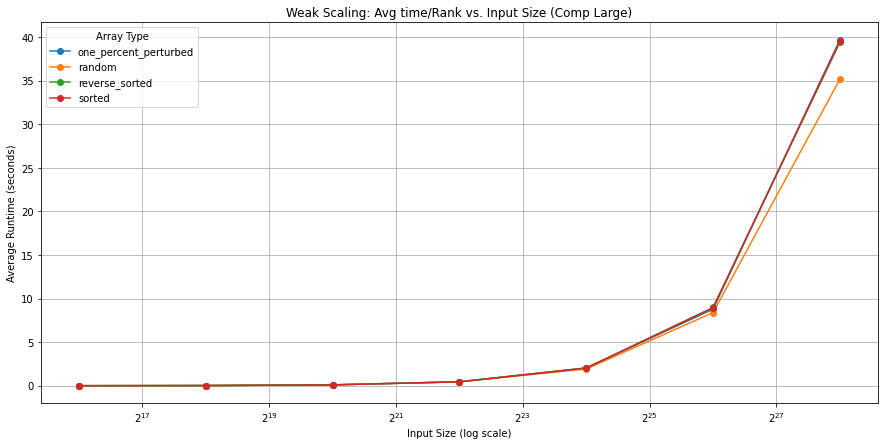

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your custom labels for array types
array_type_labels = {0: 'Random', 1: 'Sorted', 2: 'Reverse', 3: 'Perturbed'}

# Assuming 'weak_scaling' DataFrame has columns: 'input_size', 'num_procs', 'input_type', 
weak_scaling = tk.dataframe[tk.dataframe['name'] == 'comp_large']
# Group by input size and input type to calculate the average runtime
grouped_weak_scaling = weak_scaling.groupby(['input_size', 'input_type'])['Avg time/rank'].mean().reset_index()

# Plotting function for weak scaling
def plot_weak_scaling(df, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(15, 7))
    for array_type in df['input_type'].unique():
        filtered_df = df[df['input_type'] == array_type]
        label = array_type_labels.get(array_type, f"{array_type}")  # Get custom label or default to "Type N"
        ax.plot(filtered_df['input_size'], filtered_df['Avg time/rank'], marker='o', label=label)
    
    ax.set_xscale('log', base=2)  # Set x-axis to log scale (base 2) to show powers of 2
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title="Array Type")
    plt.grid(True)
    plt.show()

# Plot the weak scaling data
plot_weak_scaling(grouped_weak_scaling, "Weak Scaling: Avg time/Rank vs. Input Size (Comp Large)", "Input Size (log scale)", "Average Runtime (seconds)")

In [28]:
weak_scaling_data = {array_type_labels.get(array_type, f"Type {array_type}"): [] for array_type in grouped_weak_scaling['input_type'].unique()}

# Populate the lists with tuples of (input_size, Avg time/rank) for each array type
for array_type in grouped_weak_scaling['input_type'].unique():
    filtered_df = grouped_weak_scaling[grouped_weak_scaling['input_type'] == array_type]
    label = array_type_labels.get(array_type, f"Type {array_type}")
    weak_scaling_data[label] = list(zip(filtered_df['input_size'], filtered_df['Avg time/rank']))

# Display the weak scaling data for verification
for label, data in weak_scaling_data.items():
    print(f"{label}: {data}")

Type one_percent_perturbed: [(65536, 0.0042613), (262144, 0.0210778), (1048576, 0.10116420000000001), (4194304, 0.45639460000000004), (16777216, 2.0459063), (67108864, 8.788441), (268435456, 39.6959719)]
Type random: [(65536, 0.0050756), (262144, 0.022050800000000002), (1048576, 0.10073259999999999), (4194304, 0.45594150000000006), (16777216, 1.9186104999999998), (67108864, 8.3968825), (268435456, 35.173833099999996)]
Type reverse_sorted: [(65536, 0.005161499999999999), (262144, 0.0215575), (1048576, 0.1016096), (4194304, 0.4538146), (16777216, 2.0229247), (67108864, 8.9813496), (268435456, 39.403418599999995)]
Type sorted: [(65536, 0.0043647), (262144, 0.0215769), (1048576, 0.09788499999999999), (4194304, 0.44571749999999993), (16777216, 2.035345), (67108864, 8.9523267), (268435456, 39.550687599999996)]


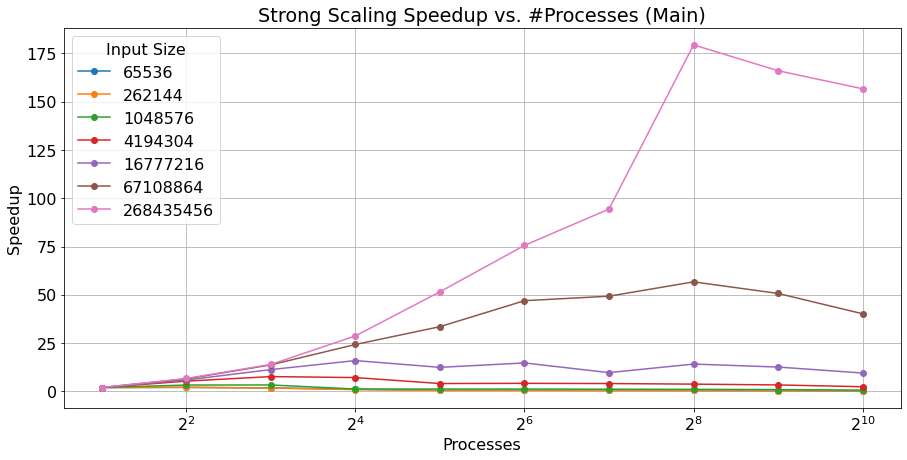

In [61]:
df_main_size = {}
df_comp_size = {}
df_comm_size = {}
df_group_main = {}
df_group_comp = {}
df_group_comm = {}
df_baseline_main = {}
df_baseline_comp = {}
df_baseline_comm = {}
df_merged_main = {}
df_merged_comp = {}
df_merged_comm = {}
for i in input_sizes:
    df_main_size[str(i)] = tk_input_size[str(i)].dataframe[tk_input_size[str(i)].dataframe['name'] == 'main']
    df_comp_size[str(i)] = tk_input_size[str(i)].dataframe[tk_input_size[str(i)].dataframe['name'] == 'comp_large']
    df_comm_size[str(i)] = tk_input_size[str(i)].dataframe[tk_input_size[str(i)].dataframe['name'] == 'comm']
    df_group_main[str(i)] = df_main_size[str(i)].groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()
    df_group_comp[str(i)] = df_comp_size[str(i)].groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()
    df_group_comm[str(i)] = df_comm_size[str(i)].groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()
    df_baseline_main[str(i)] = df_group_main[str(i)][df_group_main[str(i)]['num_procs'] == 2].copy()
    df_baseline_main[str(i)]['T_1'] = df_baseline_main[str(i)]['Avg time/rank']*2
    df_baseline_comp[str(i)] = df_group_comp[str(i)][df_group_comp[str(i)]['num_procs'] == 2].copy()
    df_baseline_comp[str(i)]['T_1'] = df_baseline_comp[str(i)]['Avg time/rank']*2
    df_baseline_comm[str(i)] = df_group_comm[str(i)][df_group_comm[str(i)]['num_procs'] == 2].copy()
    df_baseline_comm[str(i)]['T_1'] = df_baseline_comm[str(i)]['Avg time/rank']*2
    df_merged_main[str(i)] = pd.merge(df_group_main[str(i)], df_baseline_main[str(i)][['input_type', 'T_1']], on='input_type', how='left')
    df_merged_comp[str(i)] = pd.merge(df_group_comp[str(i)], df_baseline_comp[str(i)][['input_type', 'T_1']], on='input_type', how='left')
    df_merged_comm[str(i)] = pd.merge(df_group_comm[str(i)], df_baseline_comm[str(i)][['input_type', 'T_1']], on='input_type', how='left')
    df_merged_main[str(i)]['speedup'] = df_merged_main[str(i)]['T_1'] /  df_merged_main[str(i)]['Avg time/rank']
    df_merged_comp[str(i)]['speedup'] = df_merged_comp[str(i)]['T_1'] /  df_merged_comp[str(i)]['Avg time/rank']
    df_merged_comm[str(i)]['speedup'] = df_merged_comm[str(i)]['T_1'] /  df_merged_comm[str(i)]['Avg time/rank']
    
fig, ax = plt.subplots(figsize=(15, 7))

for i in input_sizes:
    i = str(i)
    curr_df = df_merged_main[i][df_merged_main[i]['input_type'] == 'random']
    ax.plot(curr_df['num_procs'], curr_df['speedup'], marker='o', label=i)

ax.set_title("Strong Scaling Speedup vs. #Processes (Main)")
ax.set_xlabel('Processes')
ax.set_ylabel('Speedup')
ax.set_xscale('log', base=2)
ax.legend(title='Input Size')
plt.grid(True)
plt.show()
    

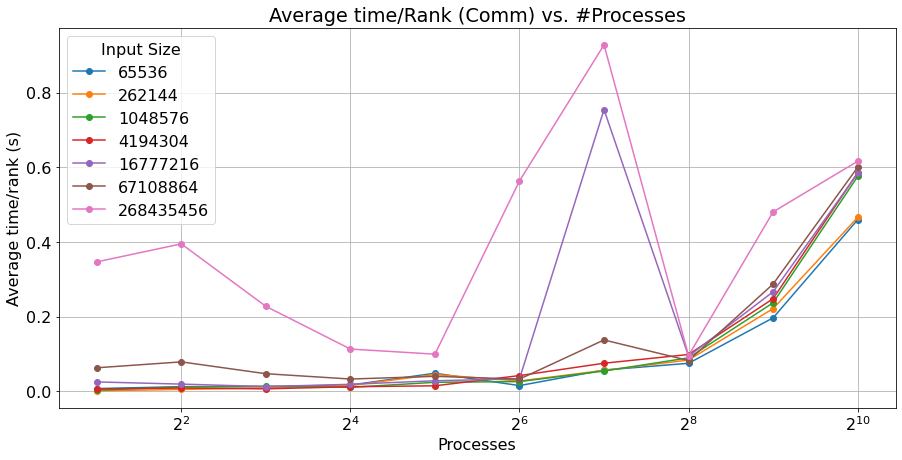

In [62]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in input_sizes:
    i = str(i)
    curr_df = df_merged_comm[i][df_merged_comm[i]['input_type'] == 'random']
    ax.plot(curr_df['num_procs'], curr_df['Avg time/rank'], marker='o', label=i)

ax.set_title("Average time/Rank (Comm) vs. #Processes")
ax.set_xlabel('Processes')
ax.set_ylabel('Average time/rank (s)')
ax.set_xscale('log', base=2)
ax.legend(title='Input Size', loc='upper left')
plt.grid(True)
plt.show()
    

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in input_sizes: i = str(i) curr_df = df_merged_main[i][df_merged_main[i]['input_type'] == 'random'] ax.plot(curr_df['num_procs'], curr_df['Avg time/rank'], marker='o', label=i)

ax.set_title("Average time/Rank (Main) vs. #Processes") ax.set_xlabel('Processes') ax.set_ylabel('Average time/rank (s)') ax.set_xscale('log', base=2) ax.legend(title='Input Size', loc='upper left') plt.grid(True) plt.show()

fig, ax = plt.subplots(figsize=(15, 7))

for i in input_sizes:
    i = str(i)
    curr_df = df_merged_main[i][df_merged_main[i]['input_type'] == 'random']
    ax.plot(curr_df['num_procs'], curr_df['Avg time/rank'], marker='o', label=i)

ax.set_title("Average time/Rank (Main) vs. #Processes")
ax.set_xlabel('Processes')
ax.set_ylabel('Average time/rank (s)')
ax.set_xscale('log', base=2)
ax.legend(title='Input Size', loc='upper left')
plt.grid(True)
plt.show()
    

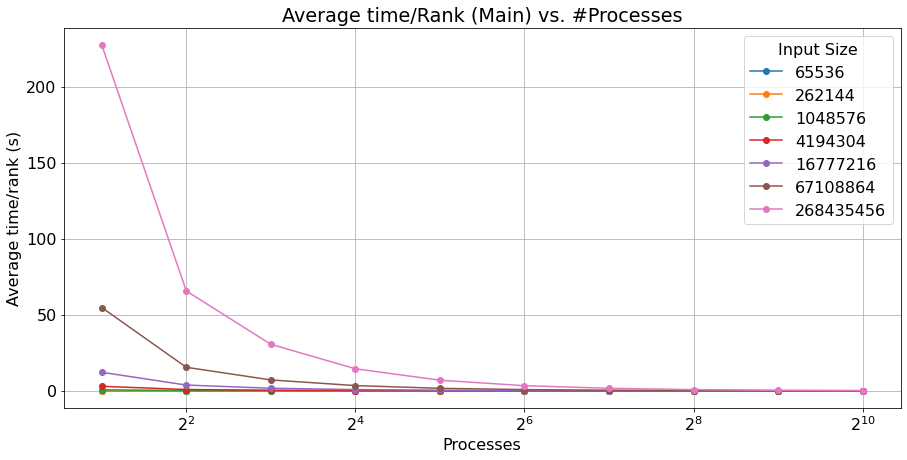

In [71]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in input_sizes:
    i = str(i)
    curr_df = df_merged_comp[i][df_merged_comp[i]['input_type'] == 'random']
    ax.plot(curr_df['num_procs'], curr_df['Avg time/rank'], marker='o', label=i)

ax.set_title("Average time/Rank (Comp Large) vs. #Processes")
ax.set_xlabel('Processes')
ax.set_ylabel('Average time/rank (s)')
ax.set_xscale('log', base=2)
ax.legend(title='Input Size', loc='upper right')
plt.grid(True)
plt.show()
    

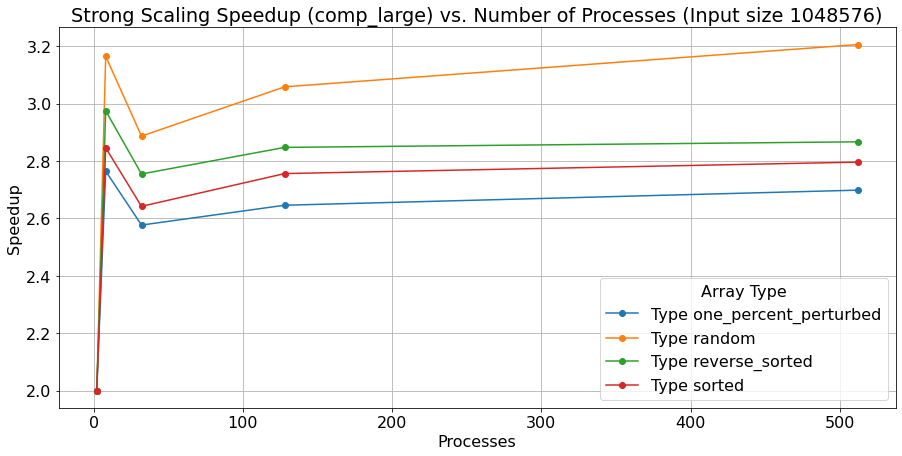

In [63]:
comp_df = tk.dataframe[tk.dataframe['name'] == 'comp_large']

# Group data by number of processes and array type, calculating the mean
grouped_df = comp_df.groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()

# Calculate speedup: Sequential time / Avg time for each process count
# Assuming num_procs == 1 is the sequential time
speedup_df = grouped_df.copy()
for input_type in speedup_df['input_type'].unique():
    seq_time = 2 * (grouped_df[(grouped_df['num_procs'] == 2) & (grouped_df['input_type'] == input_type)]['Avg time/rank'].values[0])
    speedup_df.loc[speedup_df['input_type'] == input_type, 'Speedup'] = seq_time / speedup_df[speedup_df['input_type'] == input_type]['Avg time/rank']

# Define your custom labels for array types
array_type_labels = {0: 'Random', 1: 'Sorted', 2: 'Reverse', 3: 'Perturbed'}

# Plotting function with custom labels in the legend for speedup
def plot_speedup(df, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(15, 7))
    for array_type in df['input_type'].unique():
        filtered_df = df[df['input_type'] == array_type]
        label = array_type_labels.get(array_type, f"Type {array_type}")  # Get custom label or default to "Type N"
        ax.plot(filtered_df['num_procs'], filtered_df['Speedup'], marker='o', label=label)
    
    ax.set_title(title)
#     ax.set_xscale("log",base=2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title="Array Type")
    plt.grid(True)
    plt.show()

# Plot the speedup data
plot_speedup(speedup_df, "Strong Scaling Speedup (comp_large) vs. Number of Processes (Input size 1048576)", "Processes", "Speedup")


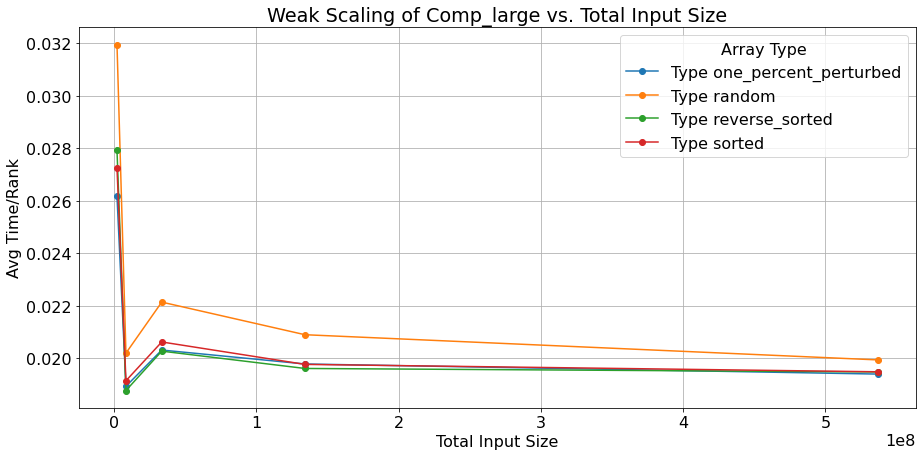

In [64]:
# Assuming that the workload (array size) is defined and constant per process for weak scaling.
# For example, let's say the input size is defined as follows:
base_input_size = 1048576  # Total input size for the base case

# Create a weak scaling DataFrame
# Here we assume that the workload increases proportionally with the number of processes.
# For example, if you have 1 process with input size 1048576, then 2 processes should have input size 2 * 1048576, and so on.

# Add a new column for total input size based on the number of processes
grouped_df['total_input_size'] = grouped_df['num_procs'] * base_input_size

# We filter for weak scaling by keeping a constant workload per process.
# This can vary based on your exact definition; ensure to match with your logic.
# Here, we create a new DataFrame for weak scaling by grouping by total input size.
weak_scaled_df = grouped_df.groupby(['total_input_size', 'input_type'])['Avg time/rank'].mean().reset_index()

# Define your weak scaling plotting function
def plot_weak_scaling(df, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(15, 7))
    for array_type in df['input_type'].unique():
        filtered_df = df[df['input_type'] == array_type]
        label = array_type_labels.get(array_type, f"Type {array_type}")  # Get custom label or default to "Type N"
        ax.plot(filtered_df['total_input_size'], filtered_df['Avg time/rank'], marker='o', label=label)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title="Array Type")
    plt.grid(True)
    plt.show()

# Plot the weak scaling data
plot_weak_scaling(weak_scaled_df, "Weak Scaling of Comp_large vs. Total Input Size", "Total Input Size", "Avg Time/Rank")


In [65]:
# Filter for only 'comp' in the 'name' column
comp_df = tk.dataframe[tk.dataframe['name'] == 'comp_large']

# Group data by number of processes and array type, calculating the mean
grouped_df = comp_df.groupby(['num_procs', 'input_type'])['Avg time/rank'].mean().reset_index()

# Define your custom labels for array types
array_type_labels = {0: 'Random', 1: 'Sorted', 2: 'Reverse', 3: 'Perturbed'}

# Initialize a dictionary to store data in lists by array type
data_lists = {array_type: [] for array_type in array_type_labels.values()} 
print(data_lists)

# Populate the lists with tuples of (num_procs, Avg time/rank) for each array type
for array_type, label in array_type_labels.items():
    filtered_df = grouped_df[grouped_df['input_type'] == array_type]
    data_lists[label] = list(zip(filtered_df['num_procs'], filtered_df['Avg time/rank']))
    print(data_lists[label])

# Now `data_lists` contains lists of (num_procs, Avg time/rank) for each array type
# You can print it to verify
for label, data in data_lists.items():
    print(f"{label}: {data}")

{'Random': [], 'Sorted': [], 'Reverse': [], 'Perturbed': []}
[]
[]
[]
[]
Random: []
Sorted: []
Reverse: []
Perturbed: []
